#instalacion de Facenet Pytorch

In [ ]:
!pip3 install facenet_pytorch

     |████████████████████████████████| 1.9 MB 7.1 MB/s 


#Importamos las librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files 
import glob
from google.colab import drive

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt   

In [ ]:
import torch
from facenet_pytorch import MTCNN
import numpy as np
import os
import pandas as pd

#verificamos que exista o no GPU, en colab podemos hacer uso de GPU con :

-Entorno de ejecucion->Cambiar tipo de entorno de ejecucion->GPU

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')#indicamos si hay o no gpu
print('Running on device: {}'.format(device))

Running on device: cuda:0


#Declaracion de la MTCNN con los parametros adecuados para el reconocimientos de rostros



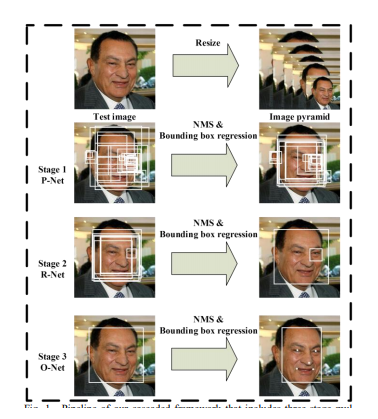

##La MTCNN es una CNN multitarea para detección facial en tiempo real.

El pipeline es el siguiente:



>Etapa 1: Se utliza una red completamente convolucional llamada "Proposal Network" (P-Net) para obtener las ventanas candidatas.

>Etapa 2: Todos los candidatos se pasan por otra CNN llamada Refine Network (R-Net) que elimina una gran cantidad de candidatos.

>Etapa 3: La output network (O-Net) selecciona 5 landmarks (ojos, nariz, extremos de la
boca)

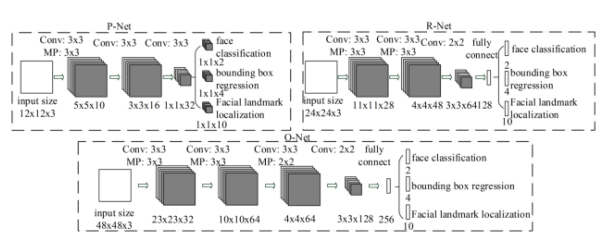

## Durante el entrenamiento se toman en cuenta 3 tareas:

>1. Clasificación binaria entre cara y no cara para cada muestra, se usa la función de
pérdida de entropía cruzada.

>2. Regresión aplicada al cuadro delimitador, minimizando la pérdida euclidiana.

>3. Localización de puntos de referencia faciales a través de regresión, minimizando la
pérdida euclidiana.

>4. Entrenamiento desde múltiples fuentes: Dado que se emplearon diferentes tareas
en cada CNNs, hay diferentes tipos de imágenes de entrenamiento en el proceso
de aprendizaje, como cara, no cara y cara parcialmente alineada.

In [ ]:
mtcnn = MTCNN(
            select_largest = False,
            min_face_size  = 200,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = True,
            device         = device
        )

## path debe contener la ruta donde se encuentren las imagenes donde se desean detectar rostros

In [ ]:
path="/content/drive/MyDrive/Datos - Hackathon JusticIA/Expedientes"

In [ ]:
lista=os.listdir(path)

In [ ]:
RETO1CSV=pd.DataFrame(columns=['filename','width','height','class','xmin','ymin','xmax','ymax'])

##.detect hace la prediccion sobre las imagenes , la imagen debe tener 3 canales para poder ingregar a el objeto mtcnn, si detectamos algun objeto regresara las cordenadas y ademas la probabilidad de que sea o no un rostro , ademas se guardara en el csv indicado para la evaluacion

In [ ]:
for i in lista:
  imagen_1 = cv2.imread(path+"/"+i)
  w,h,_=imagen_1.shape
  boxes, probs= mtcnn.detect(imagen_1, landmarks=False)
  if (boxes is not None) and len(boxes) > 0:
    for b in boxes:
      RETO1CSV.loc[len(RETO1CSV.index)]=[i,w,h,"face",b[0],b[1],b[2],b[3]]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


##Mostramos el csv resultante 

In [ ]:
display(RETO1CSV)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-312...,3456,2592,face,1001.721436,1384.911987,1606.008423,2157.521973
1,AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-319...,3456,2592,face,1408.868896,457.172668,1803.501587,973.280945
2,AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-318...,3456,2592,face,1417.185547,891.515259,1599.339966,1128.502075
3,AGN_DFS_C.240_Sanchez_Fuerte_Maria_Marcela_pg-...,3456,2592,face,822.390625,512.584717,1360.119507,1204.868042
4,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-082.jpg,3456,2592,face,966.860718,423.532562,1571.520142,1171.314941
5,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-060.jpg,3456,2592,face,963.413208,452.392059,1364.090454,971.068176
6,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-063.jpg,2592,3456,face,1374.575073,807.607727,1768.916504,1309.637207
7,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-061.jpg,3456,2592,face,1034.252686,323.131012,1790.675171,1310.092285
8,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-049.jpg,2592,3456,face,680.031494,653.953979,1407.819824,1673.347046
9,AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-062.jpg,3456,2592,face,1037.744507,848.272095,1441.838745,1389.239136


##El CSV se debe guardar en un ruta existente en el drive, si copian este colab es necesario cambiar la ruta donde se guarda 

In [ ]:
RETO1CSV.to_csv("/content/drive/MyDrive/rostros.csv",index=False)